In [79]:
import pandas as pd
weather = pd.read_csv("../10-timeSeriesForecastingXGBoost/data/Auckland_NOAA.csv", index_col="DATE")
weather

,STATION,NAME,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,
1994-08-02,NZM00093110,"AUCKLAND AERO AWS, NZ",NaN,56,NaN,NaN
1994-08-03,NZM00093110,"AUCKLAND AERO AWS, NZ",NaN,55,NaN,NaN
1994-08-04,NZM00093110,"AUCKLAND AERO AWS, NZ",0.00,52,NaN,NaN
1994-08-05,NZM00093110,"AUCKLAND AERO AWS, NZ",0.02,54,NaN,NaN
1994-08-06,NZM00093110,"AUCKLAND AERO AWS, NZ",0.00,53,NaN,NaN
...,...,...,...,...,...,...
2023-07-08,NZM00093110,"AUCKLAND AERO AWS, NZ",0.39,53,61.0,NaN
2023-07-09,NZM00093110,"AUCKLAND AERO AWS, NZ",0.09,55,59.0,46.0
2023-07-10,NZM00093110,"AUCKLAND AERO AWS, NZ",0.13,56,60.0,48.0


In [80]:
null_percentage = weather.apply(pd.isnull).sum() / weather.shape[0]
null_percentage

STATION    0.000000
NAME       0.000000
PRCP       0.142667
TAVG       0.000000
TMAX       0.310047
TMIN       0.544625
dtype: float64

In [81]:
# valid_columns = weather.columns[null_percentage < .05]
# valid_columns

In [82]:
# weather = weather[valid_columns].copy()
weather.columns = weather.columns.str.lower()
weather

,station,name,prcp,tavg,tmax,tmin
DATE,,,,,,
1994-08-02,NZM00093110,"AUCKLAND AERO AWS, NZ",NaN,56,NaN,NaN
1994-08-03,NZM00093110,"AUCKLAND AERO AWS, NZ",NaN,55,NaN,NaN
1994-08-04,NZM00093110,"AUCKLAND AERO AWS, NZ",0.00,52,NaN,NaN
1994-08-05,NZM00093110,"AUCKLAND AERO AWS, NZ",0.02,54,NaN,NaN
1994-08-06,NZM00093110,"AUCKLAND AERO AWS, NZ",0.00,53,NaN,NaN
...,...,...,...,...,...,...
2023-07-08,NZM00093110,"AUCKLAND AERO AWS, NZ",0.39,53,61.0,NaN
2023-07-09,NZM00093110,"AUCKLAND AERO AWS, NZ",0.09,55,59.0,46.0
2023-07-10,NZM00093110,"AUCKLAND AERO AWS, NZ",0.13,56,60.0,48.0


In [83]:
weather = weather.ffill()
weather.apply(pd.isnull).sum()

station       0
name          0
prcp          2
tavg          0
tmax       2931
tmin       2933
dtype: int64

In [84]:
weather.dtypes

station     object
name        object
prcp       float64
tavg         int64
tmax       float64
tmin       float64
dtype: object

In [85]:
weather.index

Index(['1994-08-02', '1994-08-03', '1994-08-04', '1994-08-05', '1994-08-06',
       '1994-08-07', '1994-08-08', '1994-08-09', '1994-08-10', '1994-08-11',
       ...
       '2023-07-03', '2023-07-04', '2023-07-05', '2023-07-06', '2023-07-07',
       '2023-07-08', '2023-07-09', '2023-07-10', '2023-07-11', '2023-07-12'],
      dtype='object', name='DATE', length=10521)

In [86]:
weather.index = pd.to_datetime(weather.index)
weather.index

DatetimeIndex(['1994-08-02', '1994-08-03', '1994-08-04', '1994-08-05',
               '1994-08-06', '1994-08-07', '1994-08-08', '1994-08-09',
               '1994-08-10', '1994-08-11',
               ...
               '2023-07-03', '2023-07-04', '2023-07-05', '2023-07-06',
               '2023-07-07', '2023-07-08', '2023-07-09', '2023-07-10',
               '2023-07-11', '2023-07-12'],
              dtype='datetime64[ns]', name='DATE', length=10521, freq=None)

In [87]:
weather.index.year.value_counts().sort_index()

DATE
1994    152
1995    346
1996    362
1997    365
1998    364
1999    364
2000    366
2001    365
2002    364
2003    364
2004    366
2005    365
2006    362
2007    364
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    363
2015    357
2016    365
2017    365
2018    363
2019    362
2020    366
2021    361
2022    365
2023    193
Name: count, dtype: int64

<Axes: xlabel='DATE'>

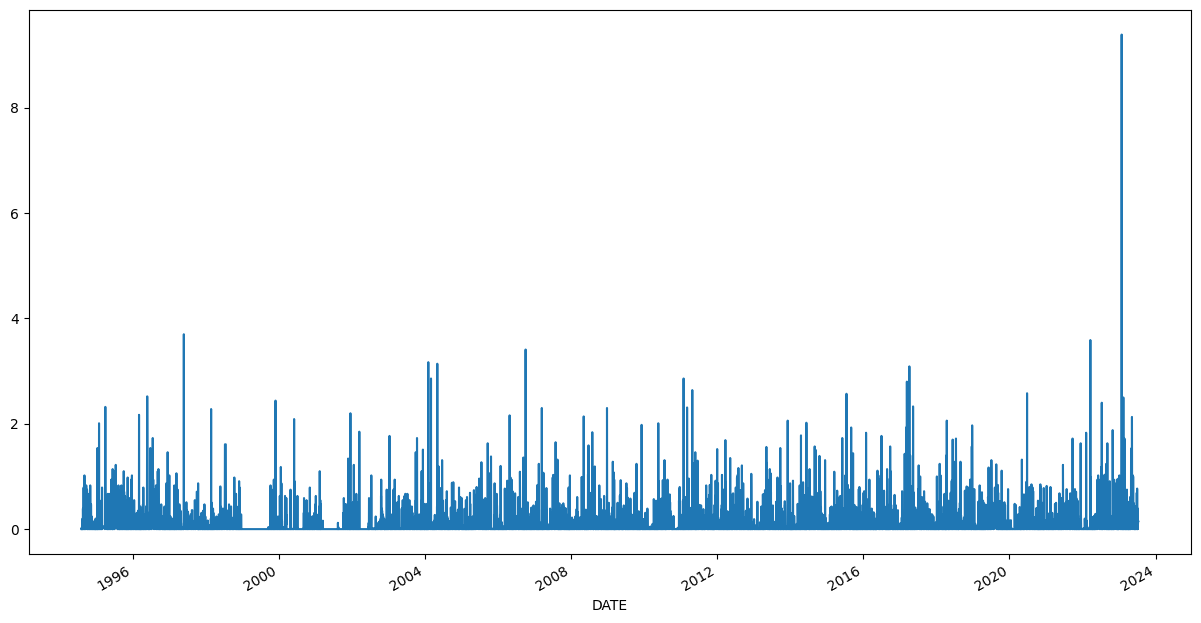

In [88]:
weather["prcp"].plot(figsize=(15,8))

<Axes: xlabel='DATE'>

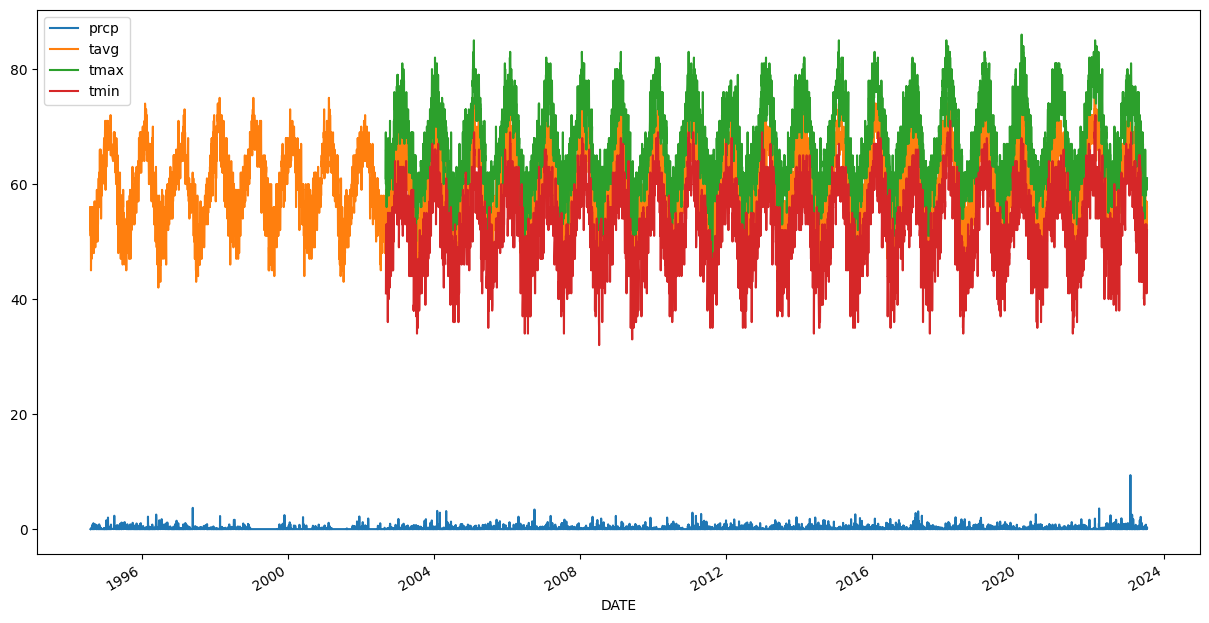

In [89]:
weather.plot(figsize=(15,8))

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant features for the heatmap
selected_features = ['PRCP', 'TAVG', 'TMAX', 'TMIN']

# Calculate correlation matrix
correlation_matrix = weather[selected_features].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Weather Features')
plt.show()

KeyError: "None of [Index(['PRCP', 'TAVG', 'TMAX', 'TMIN'], dtype='object')] are in the [columns]"